In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tqdm import tqdm

In [2]:
df = pd.read_csv("HR Data.xlsx - HR data.csv")

In [3]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [4]:
df.nunique()

Attrition                        2
Business Travel                  3
CF_age band                      5
CF_attrition label               2
Department                       3
Education Field                  6
emp no                        1470
Employee Number               1470
Gender                           2
Job Role                         9
Marital Status                   3
Over Time                        2
Over18                           1
Training Times Last Year         7
Age                             43
CF_current Employee              2
Daily Rate                     886
Distance From Home              29
Education                        5
Employee Count                   1
Environment Satisfaction         4
Hourly Rate                     71
Job Involvement                  4
Job Level                        5
Job Satisfaction                 4
Monthly Income                1349
Monthly Rate                  1427
Num Companies Worked            10
Percent Salary Hike 

In [5]:
df.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [6]:
df.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


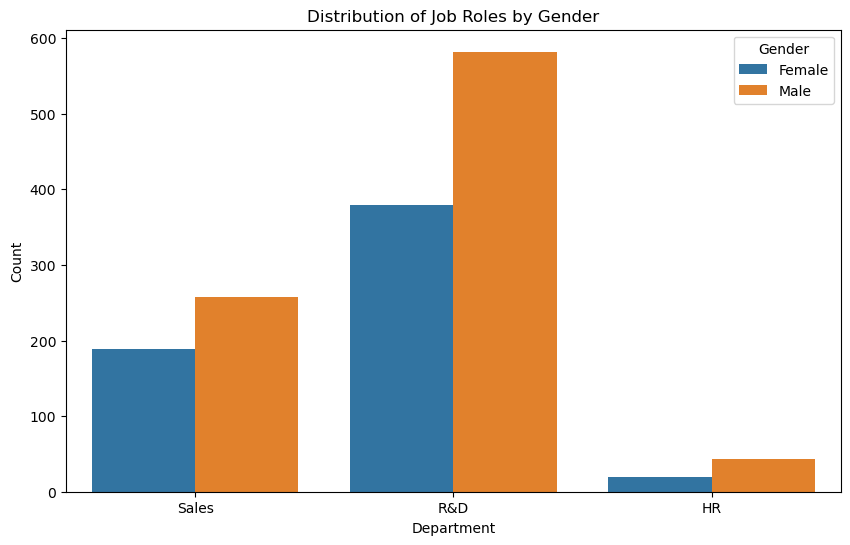

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Gender')
plt.title('Distribution of Job Roles by Gender')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [ ]:
# Calculate the count of each gender in each job role
gender_job_counts = df.groupby(['Job Role', 'Gender']).size().unstack(fill_value=0)

# Colors for the pie chart
colors = ['blue', 'green']

# Create pie charts for each job role
for job_role in gender_job_counts.index:
    # Get the counts for the current job role
    counts = gender_job_counts.loc[job_role]
    
    # Plot the pie chart
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Gender Distribution in {job_role}')
    plt.show()

In [ ]:
df.assign(count=1).pivot_table(columns = 'Gender', values='count', aggfunc='sum', fill_value=0)

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
df_sampled = df.sample(frac=0.1)  # Take a 10% random sample of the data
sns.pairplot(df_sampled[['Business Travel', 'CF_age band', 'Department', 'Education Field', 'Gender', 
                 'Job Role', 'Marital Status', 'Over Time', 'Over18', 'Training Times Last Year', 
                 'Age', 'CF_current Employee', 'Daily Rate', 'Distance From Home', 'Education', 
                 'Employee Count', 'Environment Satisfaction', 'Hourly Rate', 'Job Involvement', 
                 'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate', 
                 'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating', 
                 'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level', 
                 'Total Working Years', 'Work Life Balance', 'Years At Company', 
                 'Years In Current Role', 'Years Since Last Promotion', 'Years With Curr Manager']])


In [ ]:
sns.boxplot(x='Job Role', y='Monthly Income', data=df)
plt.xticks(rotation=90)
plt.title('Monthly Income by Job Role')
plt.show()

In [ ]:
# Group ages by Marital Status and calculate the mean, median, and count
age_stats = df.groupby('Marital Status')['Age'].agg(['mean', 'median', 'min', 'max', 'count'])

print(age_stats)


In [ ]:
sns.countplot(x='Over Time', hue='CF_attrition label', data=df)
plt.title('Attrition by Overtime')
plt.show()

In [ ]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [ ]:
corr = df.select_dtypes(include=['number']).corr()
display(corr)
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="viridis", annot_kws={"size": 15})


In [45]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (1176, 40)
Testing Data Shape: (294, 40)


In [49]:
X = df.drop(columns=['Attrition']) 
y = df['Attrition']

In [51]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X_train

,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,CF_age band
1097,0,35 - 44,Current Employees,1,3,641,1804,Male,4,0,...,3,80,1,15,3,7,7,1,7,1
727,0,Under 25,Current Employees,1,1,14,1012,Male,6,2,...,4,80,0,0,3,0,0,0,0,4
254,2,25 - 34,Current Employees,2,2,954,349,Male,7,0,...,4,80,1,10,3,3,2,0,2,0
1175,2,25 - 34,Current Employees,1,5,323,1415,Male,2,1,...,2,80,1,7,2,3,2,0,2,0
1341,1,45 - 54,Current Employees,1,3,406,1520,Female,3,0,...,1,80,1,26,3,14,9,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,25 - 34,Current Employees,1,5,466,1597,Male,0,1,...,2,80,1,8,2,8,2,7,7,0
1294,2,Under 25,Current Employees,2,3,348,1445,Female,7,1,...,3,80,2,5,3,5,4,0,3,4
860,1,Under 25,Ex-Employees,1,1,163,1203,Male,6,1,...,2,80,1,1,3,0,0,0,0,4
1459,2,45 - 54,Ex-Employees,1,3,652,1821,Female,0,1,...,4,80,1,13,4,9,7,3,7,2


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['Education'] = le.fit_transform(df['Education'])
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Business Travel'] = le.fit_transform(df['Business Travel'])
df['CF_age band '] = le.fit_transform(df['CF_age band'])
df['Education Field'] = le.fit_transform(df['Education Field'])
df['emp no'] = le.fit_transform(df['emp no'])
df['Job Role'] = le.fit_transform(df['Job Role'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Over Time'] = le.fit_transform(df['Over Time'])
df['Over18'] = le.fit_transform(df['Over18'])
df['Department'] = le.fit_transform(df['Department'])

In [33]:
# Assuming 'le' is an instance of LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all necessary categorical columns
categorical_columns = ['Education', 'Attrition', 'Business Travel', 'CF_age band', 
                       'Education Field', 'emp no', 'Job Role', 'Marital Status', 
                       'Over Time', 'Over18', 'Department', 'Gender','CF_attrition label','Gender']  # Add 'Gender'

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [35]:
#X = df.drop(columns=['Attrition'])  # Drop the target column
#y = df['Attrition'] 

In [37]:

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

model = LogisticRegression(max_iter=500)  # Increase the default max_iter (default is 100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

NameError: name 'LogisticRegression' is not defined

In [53]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example of loading your data
# X, y = ...  # Define your features and target variables

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=500)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8741496598639455


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [57]:
classifier = DecisionTreeClassifier()

# fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = classifier.predict(X_test)

accuracy1= accuracy_score(y_test, y_pred)
print(" Test accuracy for the first decison tree is:", accuracy1)

 Test accuracy for the first decison tree is: 1.0


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8571428571428571


In [63]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the SVC
svc_classifier = SVC()

# Fit the model on the training data
svc_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8605442176870748


In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf']  # Kernel type
}

# Initialize the SVM classifier
svm = SVC(random_state=1)

# Initialize GridSearchCV with the SVM classifier and parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the SVM model with the best parameters
best_svm = SVC(**best_params, random_state=1)
best_svm.fit(X_train, y_train)

# Evaluate the model
train_accuracy = best_svm.score(X_train, y_train)
test_accuracy = best_svm.score(X_test, y_test)


print("Best cross-validation score:", best_score)
print("Train accuracy with best parameters:", train_accuracy)
print("Test accuracy with best parameters:", test_accuracy)


Best cross-validation score: 0.8333357374684457
Train accuracy with best parameters: 0.8333333333333334
Test accuracy with best parameters: 0.8605442176870748


In [69]:
target = df['Attrition']  

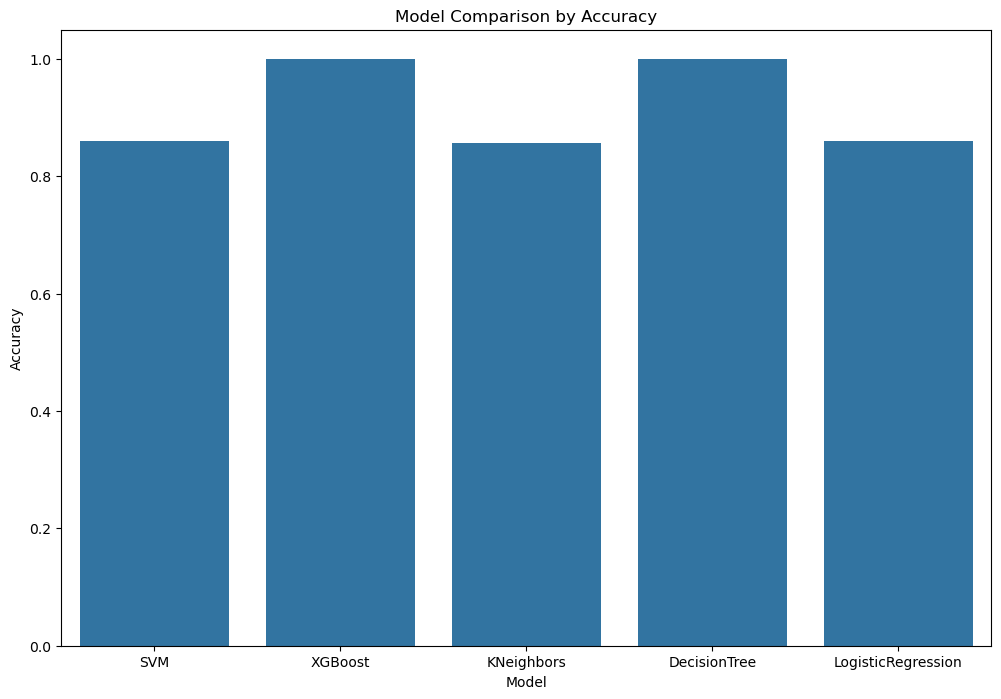

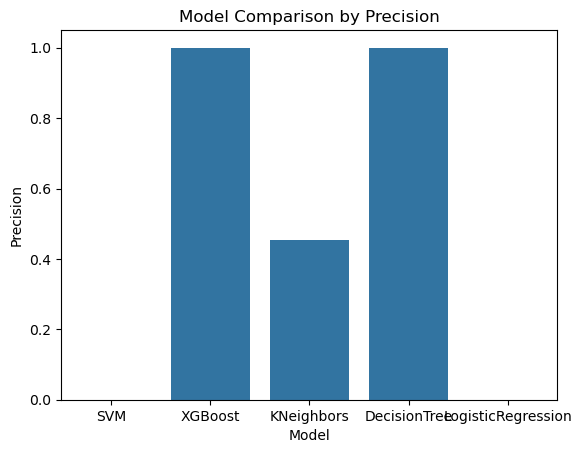

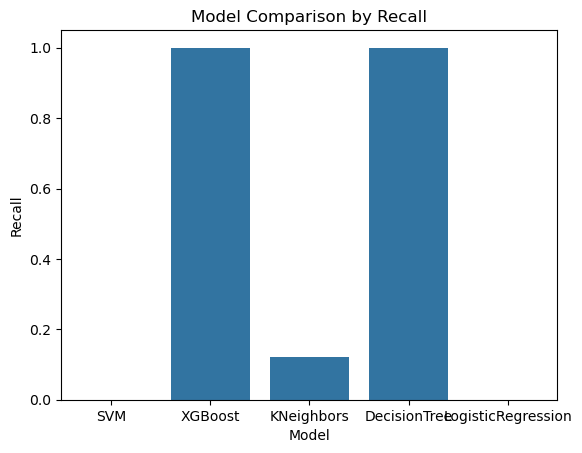

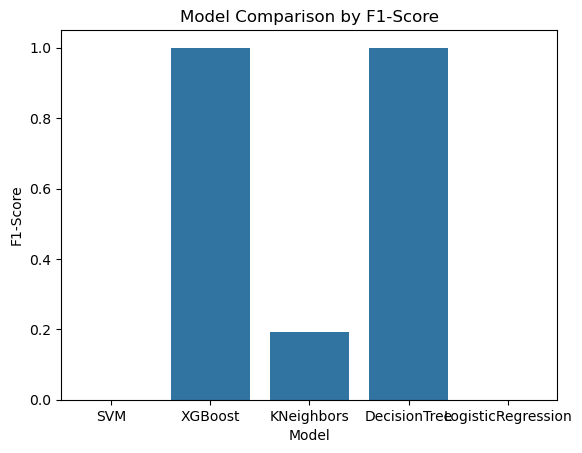

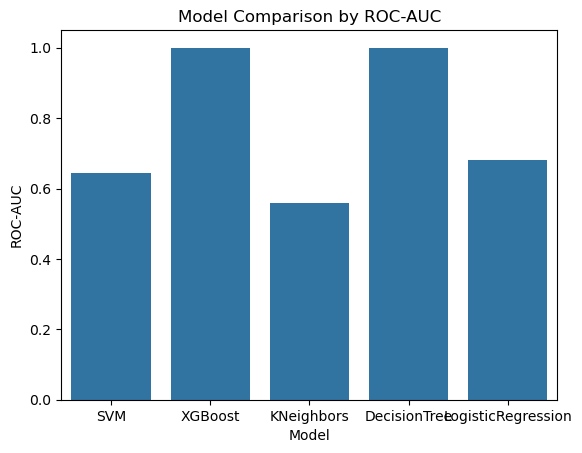

                Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                 SVM  0.860544   0.000000  0.000000  0.000000  0.644172
1             XGBoost  1.000000   1.000000  1.000000  1.000000  1.000000
2          KNeighbors  0.857143   0.454545  0.121951  0.192308  0.558276
3        DecisionTree  1.000000   1.000000  1.000000  1.000000  1.000000
4  LogisticRegression  0.860544   0.000000  0.000000  0.000000  0.680228


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset preprocessing
# Replace this with your actual dataset loading
# df = pd.read_csv("your_dataset.csv")

# Define classifiers
models = {
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Visualization
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for metric in metrics:
    sns.barplot(data=results_df, x="Model", y=metric)
    plt.title(f'Model Comparison by {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

# Display results
print(results_df)


In [73]:
print(f'We had an accuracy of {grid_search.best_score_ * 100:.2f}%')

We had an accuracy of 83.33%


In [75]:
best_pipeline = grid_search.best_estimator_

In [77]:
predictions = best_pipeline.predict(X_test)

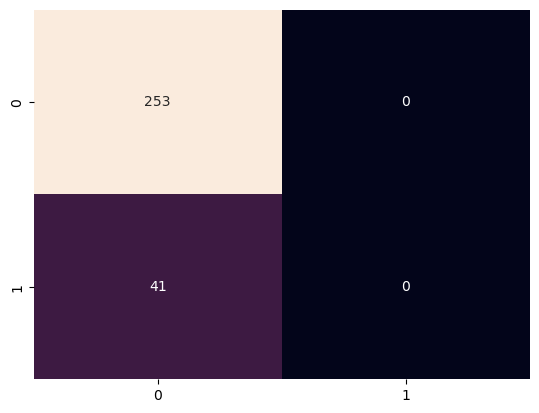

In [79]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.5g',cbar=False)
plt.show()

In [89]:
print(type(best_pipeline))

<class 'sklearn.svm._classes.SVC'>


In [93]:
support_vectors = best_pipeline.support_vectors_
print(support_vectors)

[[0. 1. 0. ... 1. 7. 1.]
 [0. 4. 0. ... 0. 0. 4.]
 [2. 0. 0. ... 0. 2. 0.]
 ...
 [2. 4. 1. ... 0. 0. 4.]
 [1. 4. 1. ... 0. 0. 4.]
 [2. 2. 1. ... 3. 7. 2.]]


In [95]:
print(best_pipeline.support_vectors_)  # This will raise an error if the model is not fitted.


[[0. 1. 0. ... 1. 7. 1.]
 [0. 4. 0. ... 0. 0. 4.]
 [2. 0. 0. ... 0. 2. 0.]
 ...
 [2. 4. 1. ... 0. 0. 4.]
 [1. 4. 1. ... 0. 0. 4.]
 [2. 2. 1. ... 3. 7. 2.]]


In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example step: scaling features
    ('svm', SVC(kernel='linear'))  # SVC with a linear kernel
])

pipeline.fit(X_train, y_train)  # Train the pipeline
best_pipeline = pipeline  # Save the trained pipeline


In [99]:
svm_model = best_pipeline.named_steps['svm']
print(svm_model.support_vectors_)

[[ 0.60442875  0.78811303 -0.4472136  ... -0.35976145  3.38154462
   0.78811303]
 [ 0.60442875 -0.07484872 -0.4472136  ... -0.35976145 -0.29927091
  -0.07484872]
 [-0.90792914  0.78811303 -0.4472136  ... -0.68076256  1.11642737
   0.78811303]
 ...
 [ 0.60442875 -0.93781048  2.23606798 ... -0.35976145  1.39956702
  -0.93781048]
 [ 0.60442875  2.51403653  2.23606798 ... -0.03876034 -1.14868988
   2.51403653]
 [-0.90792914 -0.93781048  2.23606798 ... -0.68076256 -1.14868988
  -0.93781048]]


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [109]:
coefs = best_pipeline.named_steps['svm'].coef_

In [113]:
names = best_pipeline.named_steps['scaler'].get_feature_names_out()

Text(0.5, 1.0, 'Feature Importances')

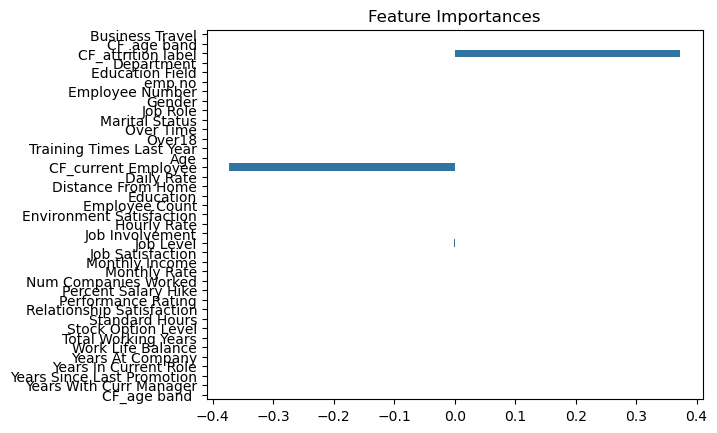

In [119]:
sns.barplot(y = names, x = coefs[0].tolist())
plt.title('Feature Importances')